In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import dill 
from sfiabp.base import base2ptrigo 
import sfiabp.vectorial.analytics as sfia

from scipy.special import factorial
# warning problem with math.factorial with large number (>21)
# dtype = object error
# from math import factorial

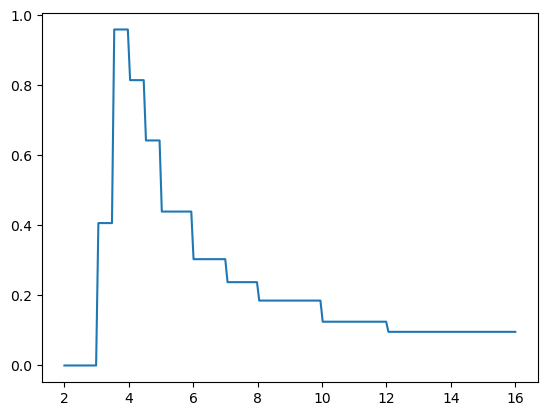

In [2]:
#### 1d function to infer ####

PathSabpFile = '/media/sf_PostDoc_Gulliver/SFI/depot_v19/exp_poncet/sfi_pinv/S_Trigo_Run1_5kHz_10Vpp_1_Strato_pinv_Step_Order_2_4000f.pkl'
with open( PathSabpFile, 'rb' ) as inp:    
    Sabp = dill.load(inp)
Sabp['lff'] = base2ptrigo.InitListFunc(Sabp['Order'], Sabp['FuncRad'], Sabp['VectorRad'],Sabp['cof2p'][0])[0]

def JanusFunc(x):
    y = 2000/(x**4)
    return y

# lfun = lambda r : Sabp['lff'][2](r,4.97,4.63) 
lfun = lambda r : Sabp['lff'][1](r,5.27,4.25) 
# lfun = JanusFunc

xtest = np.linspace(2,16,200)
plt.figure()
plt.plot(xtest,lfun(xtest))

In [3]:
np.linspace(3,6,11)

array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ])

number of basis function :  32
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155.]


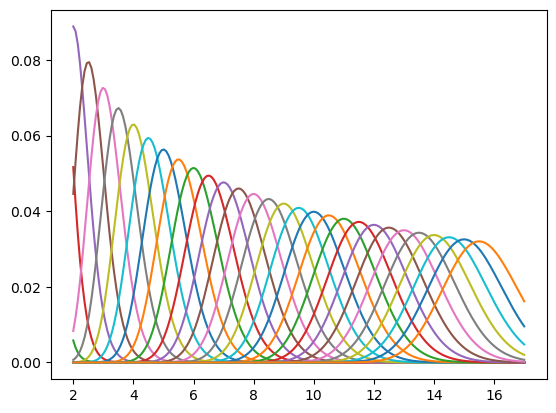

In [4]:
#### 1d basis function ####

def Poly(n) :
    xf = lambda x : (x)**n
    return xf

def Gauss(b,v) :
    xf = lambda x : np.exp(-0.5*((x-b)/v)**2)
    return xf

def Step(c,w):
    xf = lambda x : 1*(x>=(c-w))*(x<(c+w))
    return xf

def PolyExp(k,r0) :
    return lambda x: (x/r0)**k*np.exp(-x/r0)/factorial(k)

def Inv(k) :
    return lambda x: 1/x**k

# VectorRad = np.linspace(3,6,11)
# VectorDiff = np.diff(VectorRad)
# VectorDiff = np.hstack((VectorDiff,[VectorDiff[-1]]))
# Base = []
# Base = [ Gauss(VectorRad[i],1*VectorDiff[i]) for i in range(len(VectorRad)) ]

VectorRad = ( 0.1, np.arange(0,16,0.5) ) 
Wid = VectorRad[0]
Center = VectorRad[1]
VectorK = Center / Wid 
Base = [ base2ptrigo.PolyExpBig(k,Wid) for k in VectorK.astype(int) ]

# Base = [ Gauss(b,1) for b in [4.5,5.5,6.5,7.5] ]
# Base = [ Poly(n) for n in [-2,-1,0] ]
# Base = [ PolyExpShift(k,1,5) for k in np.arange(0,13,1) ]
# Base = [ PolyExp(k,2) for k in [0,1,2,3,4,5,6] ]
# Base = [ PolyExp(k,0.1) for k in np.array([30,35,40,45,50,55,60]) ]
# Base = [ PolyExp(k,1) for k in np.array([3,4,5,6,7]) ]
# Base = [ PolyExp(k,0.5) for k in np.array([ 6, 7, 8, 9, 10, 11, 12, 13]) ]
# Base = [ PolyExp(n,1) for n in np.arange(0,12,2) ]
# Base = [ Inv(k) for k in [0,1,2,3,4,5,6] ]
# pix = 1
# Base = [ Gauss(b,pix) for b in np.linspace(0,12,int(12/pix)+1,endpoint=12)]
#Base = [ PolyExp(k,1) for k in [0,1,2,3,4,5,6,8,10,12,14,16] ]
#Base = [ FourierCos(0,10,k) for k in range(20) ] 

xtest = np.linspace(2,17,200)
plt.figure()
for i in range(len(Base)):
    plt.plot(xtest,Base[i](xtest))

print('number of basis function : ', len(Base))
print(VectorK)

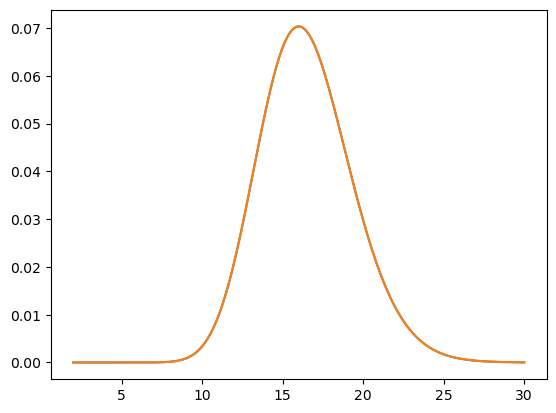

In [10]:
xtest = np.linspace(2,30,200)
plt.plot(xtest,PolyExp(32,0.5)(xtest))
plt.plot(xtest,base2ptrigo.PolyExpBig(32,0.5)(xtest))

In [37]:
#### compute the inverse with sfiprod1d #### 

# absice vector 
# xsamp = np.linspace(1,16,1600)
xsamp = np.linspace(3,16,2000)
# x2 = np.linspace(15,16,5)
# xsamp = np.concatenate((x1,x2,x2,x2,x2,x2)) 
ResFunc, vcof = sfia.sfiprod1d(lfun,Base,xsamp)


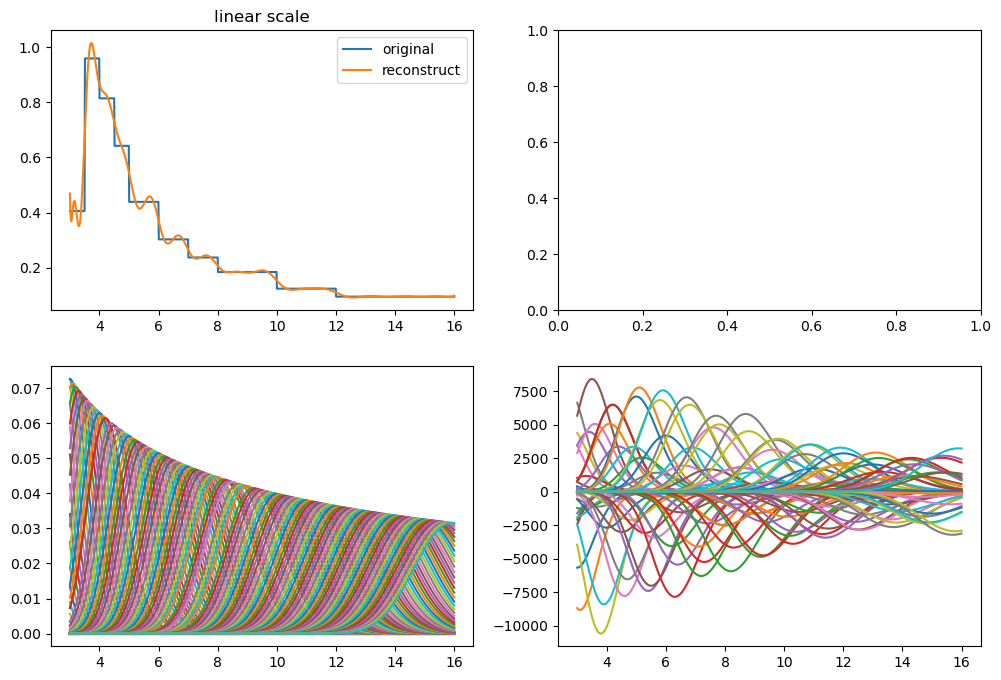

In [38]:
#### plot functions #### 

xtest = np.linspace(min(xsamp),max(xsamp),1000)  

fig, ax = plt.subplots(2,2,figsize=(12,8))

ax[0,0].set_title('linear scale')
ax[0,0].plot(xtest,lfun(xtest),label='original')
ax[0,0].plot(xtest,ResFunc(xtest),label='reconstruct')
ax[0,0].legend()

# ax[0,1].set_title('log scale')
# ax[0,1].plot(np.log(x),np.log(lfun(x)),label='original')
# ax[0,1].plot(np.log(x),np.log(ResFunc(x)),label='reconstruct')
# ax[0,1].legend()

nb = len(Base)
for i in range(nb):
    ax[1,0].plot(xtest,Base[i](xtest))

for i in range(nb):
    ax[1,1].plot(xtest,vcof[i]*Base[i](xtest))

# plt.show(block=False)
# print('a')